(120000.0, 130000.0)

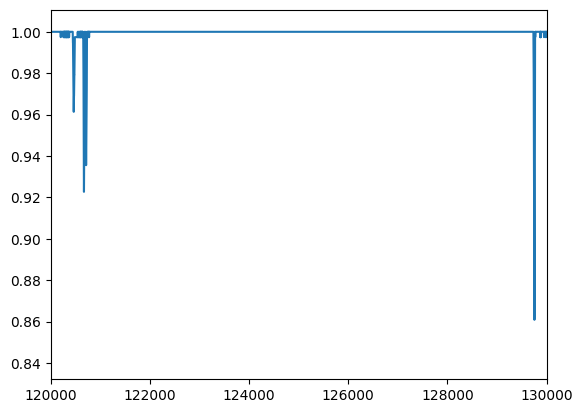

In [123]:
import numpy as np
from matplotlib import pyplot as plt

data = np.load('sample.npy')

plt.plot(data)
plt.xlim([120000,130000])



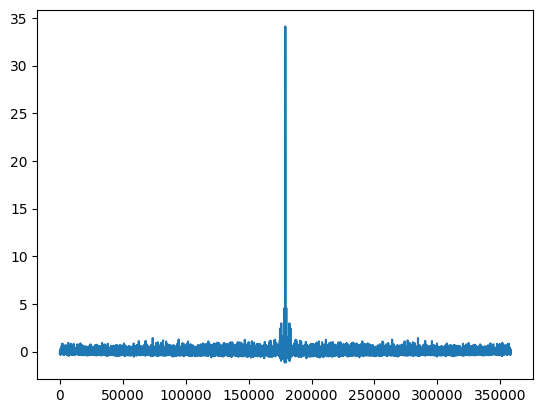

In [15]:
from scipy import signal

corr = signal.correlate(data-np.mean(data), data-np.mean(data), mode='same')

plt.plot(corr)

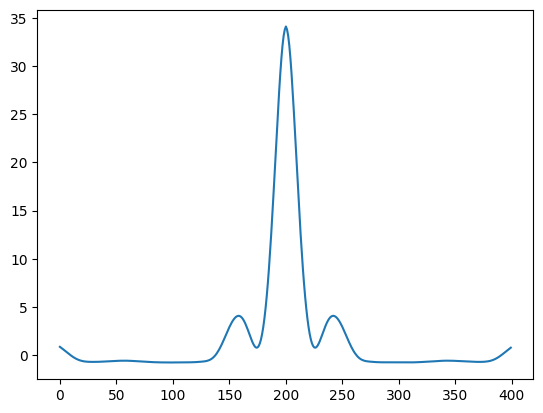

In [18]:
plt.plot(corr[179000:179400])

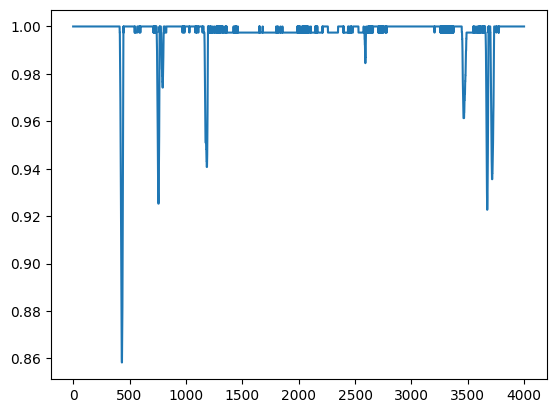

In [63]:
pattern_to_find = data[117000:121000]
plt.plot(pattern_to_find)

In [64]:
x = np.zeros(len(data))
for k in range(1,(len(data)-len(pattern_to_find)-1)):
        x[k] = np.sum(np.abs(data[k:(4000+k)]-pattern_to_find))

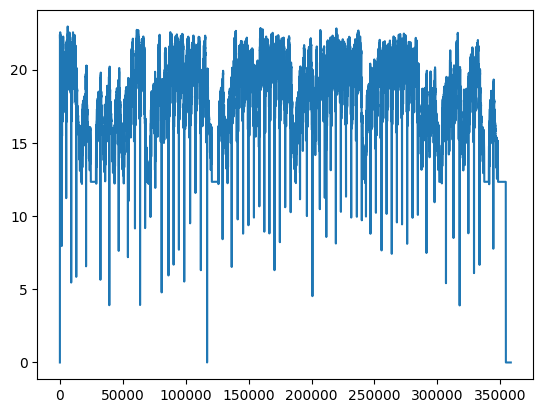

In [65]:
plt.plot(x)

In [124]:
search_lengths = range(3000,5000,100)
search_starts = range(109000,135000,2000)
search_results = np.zeros([len(search_lengths)*len(search_starts),3])
for suspected_length in search_lengths:
    for suspected_start in search_starts:
        suspected_pattern = data[range(suspected_start,suspected_start+suspected_length)]
        x = np.zeros(len(data))
        for k in range(1,(len(data)-len(suspected_pattern)-1)):
            x[k] = np.sum(np.abs(data[k:(suspected_length+k)]-suspected_pattern)) + np.sum(suspected_pattern)
            
        idx = search_lengths.index(suspected_length)*len(search_starts) + search_starts.index(suspected_start)
        search_results[idx,:] = [suspected_length,suspected_start,np.sum(x)/suspected_length]
        print("L:" + str(suspected_length) + " S:" +str(suspected_start) + " Similarity:" + str(search_results[idx]))


L:3000 S:109000 Similarity:[  3000.         109000.         355943.11369759]
L:3000 S:111000 Similarity:[  3000.         111000.         355928.35621134]
L:3000 S:113000 Similarity:[  3000.         113000.         355896.38876632]
L:3000 S:115000 Similarity:[  3000.         115000.         356055.60447423]
L:3000 S:117000 Similarity:[  3000.         117000.         355916.61102749]
L:3000 S:119000 Similarity:[  3000.         119000.         356022.49746907]
L:3000 S:121000 Similarity:[  3000.         121000.         356160.41453952]
L:3000 S:123000 Similarity:[  3000.         123000.         356160.41453952]
L:3000 S:125000 Similarity:[  3000.         125000.         356160.41453952]
L:3000 S:127000 Similarity:[  3000.        127000.        356143.5827646]
L:3000 S:129000 Similarity:[  3000.         129000.         355916.04845361]
L:3000 S:131000 Similarity:[  3000.         131000.         355943.23623883]
L:3000 S:133000 Similarity:[  3000.         133000.         356150.23052749]
L:

L:3800 S:115000 Similarity:[  3800.         115000.         355197.19361435]
L:3800 S:117000 Similarity:[  3800.        117000.        355116.0648691]
L:3800 S:119000 Similarity:[  3800.         119000.         355250.41118218]
L:3800 S:121000 Similarity:[  3800.        121000.        355359.2930799]
L:3800 S:123000 Similarity:[  3800.        123000.        355359.2930799]
L:3800 S:125000 Similarity:[  3800.        125000.        355359.2930799]
L:3800 S:127000 Similarity:[  3800.         127000.         355294.14622423]
L:3800 S:129000 Similarity:[  3800.         129000.         355133.73106552]
L:3800 S:131000 Similarity:[  3800.         131000.         355187.83652672]
L:3800 S:133000 Similarity:[  3800.        133000.        355351.2530704]
L:3900 S:109000 Similarity:[  3900.         109000.         355064.13442109]
L:3900 S:111000 Similarity:[  3900.         111000.         355024.67406159]
L:3900 S:113000 Similarity:[  3900.         113000.         355056.06736981]
L:3900 S:11500

L:4600 S:121000 Similarity:[  4600.         121000.         354558.35608472]
L:4600 S:123000 Similarity:[  4600.         123000.         354558.35608472]
L:4600 S:125000 Similarity:[  4600.         125000.         354558.35608472]
L:4600 S:127000 Similarity:[  4600.         127000.         354428.95990139]
L:4600 S:129000 Similarity:[  4600.        129000.        354342.1900818]
L:4600 S:131000 Similarity:[  4600.         131000.         354416.71806253]
L:4600 S:133000 Similarity:[  4600.         133000.         354525.91815442]
L:4700 S:109000 Similarity:[  4700.         109000.         354247.72289811]
L:4700 S:111000 Similarity:[  4700.        111000.        354234.9343107]
L:4700 S:113000 Similarity:[  4700.         113000.         354278.30359893]
L:4700 S:115000 Similarity:[  4700.        115000.        354264.2603537]
L:4700 S:117000 Similarity:[  4700.         117000.         354261.60606218]
L:4700 S:119000 Similarity:[  4700.         119000.         354370.22648552]
L:4700 S

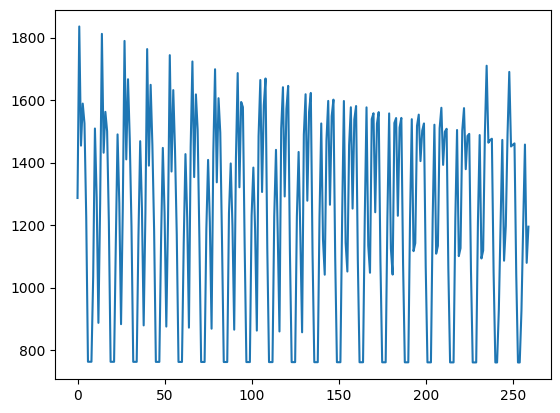

In [104]:
plt.plot(search_results[:,2])

[  4900. 121000.]


Text(0.5, 1.0, 'Minimum pattern')

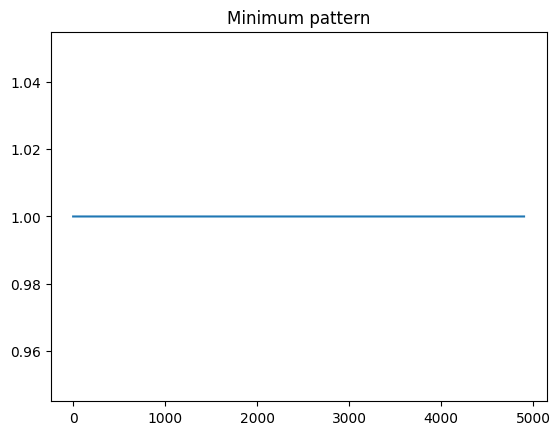

In [122]:
min_idx = search_results[:,2].argmin()
print(search_results[min_idx,[0,1]])
minimum_pattern = data[range(int(search_results[min_idx,1]), int(search_results[min_idx,1])+int(search_results[min_idx,0]))]
plt.plot(minimum_pattern)
plt.title('Minimum pattern')

In [105]:
min_idx = np.argmin(search_results)

In [106]:
print(min_idx)

761


In [109]:
len(search_results)

260

In [115]:
search_results[:,2].argmin()

253

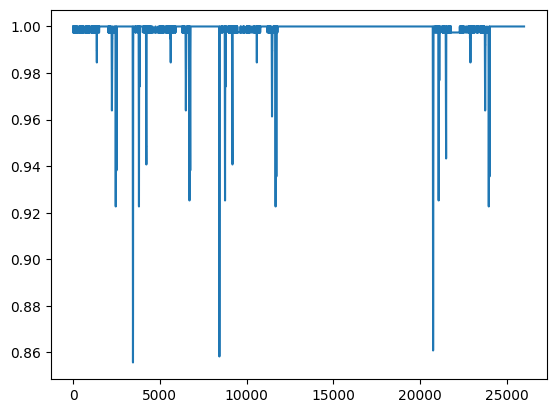

In [125]:
plt.plot(data[109000:135000])